In [26]:
#Task 2 - CREDIT CARD FRAUD DETECTION

In [27]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)


In [28]:
# load the datset
train_df = pd.read_csv(r"C:\Users\Wintewarrior\Downloads\archive (1)\fraudTrain.csv")
test_df  = pd.read_csv(r"C:\Users\Wintewarrior\Downloads\archive (1)\fraudTest.csv")

train_df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [29]:
print(train_df.shape)
print(test_df.shape)

(1296675, 23)
(555719, 23)


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [31]:
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [32]:
train_df.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

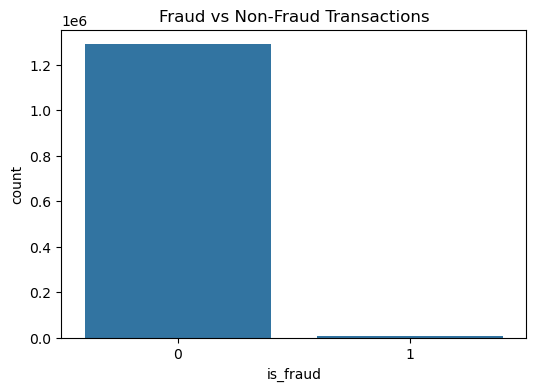

In [33]:
# Data visualizations
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=train_df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [34]:
# Data droping and preprocessing
drop_cols = [
    'Unnamed: 0',
    'cc_num',
    'first', 'last',
    'street', 'city', 'state',
    'zip',
    'trans_num'
]

train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)


In [35]:
for df in [train_df, test_df]:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['trans_day'] = df['trans_date_trans_time'].dt.day
    df['trans_month'] = df['trans_date_trans_time'].dt.month
    df['trans_weekday'] = df['trans_date_trans_time'].dt.weekday


In [36]:
train_df.drop(columns=['trans_date_trans_time'], inplace=True)
test_df.drop(columns=['trans_date_trans_time'], inplace=True)


In [37]:
for df in [train_df, test_df]:
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365


In [38]:
train_df.drop(columns=['dob'], inplace=True)
test_df.drop(columns=['dob'], inplace=True)


In [39]:
cat_cols = train_df.select_dtypes(include='object').columns
cat_cols


Index(['merchant', 'category', 'gender', 'job'], dtype='object')

In [40]:
encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

train_df[cat_cols] = encoder.fit_transform(train_df[cat_cols])
test_df[cat_cols]  = encoder.transform(test_df[cat_cols])


In [41]:
scaler = StandardScaler()

num_cols = train_df.drop('is_fraud', axis=1).columns

train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols]  = scaler.transform(test_df[num_cols])


In [42]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']


In [43]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.995531914510751
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [44]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9965306206913926
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.80      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.90      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [45]:
# RandomForest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [46]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.998765563171315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.96      0.71      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.85      0.91    555719
weighted avg       1.00      1.00      1.00    555719



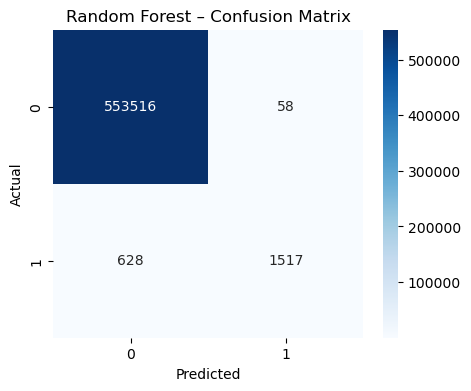

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – Confusion Matrix")
plt.show()


In [48]:
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9750496685564084


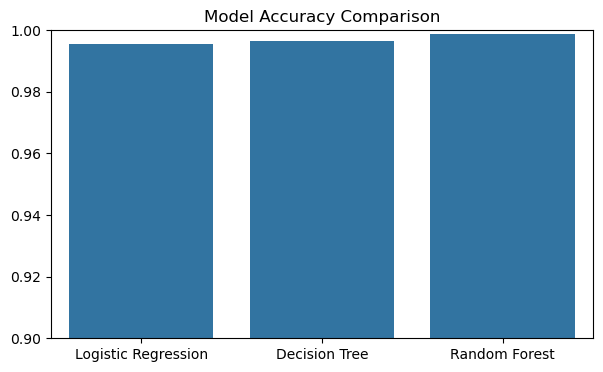

In [49]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(7,4))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)
plt.show()


In [59]:
import pandas as pd
train = pd.read_csv(r"C:\Users\Wintewarrior\Downloads\archive (1)\fraudTrain.csv")


plot_df = train.sample(min(10000, len(train)), random_state=42)


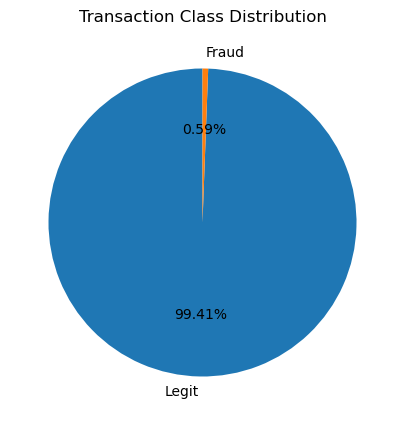

In [60]:
counts = plot_df['is_fraud'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=['Legit', 'Fraud'],
    autopct='%1.2f%%',
    startangle=90
)
plt.title("Transaction Class Distribution")
plt.show()


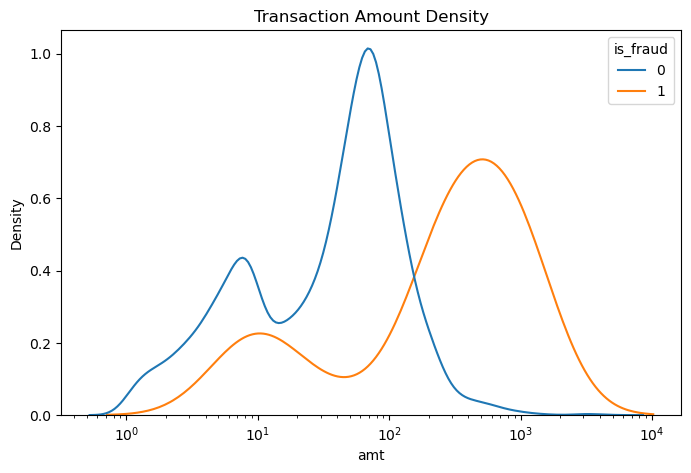

In [61]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=plot_df,
    x='amt',
    hue='is_fraud',
    log_scale=True,
    common_norm=False
)

plt.title("Transaction Amount Density")
plt.show()


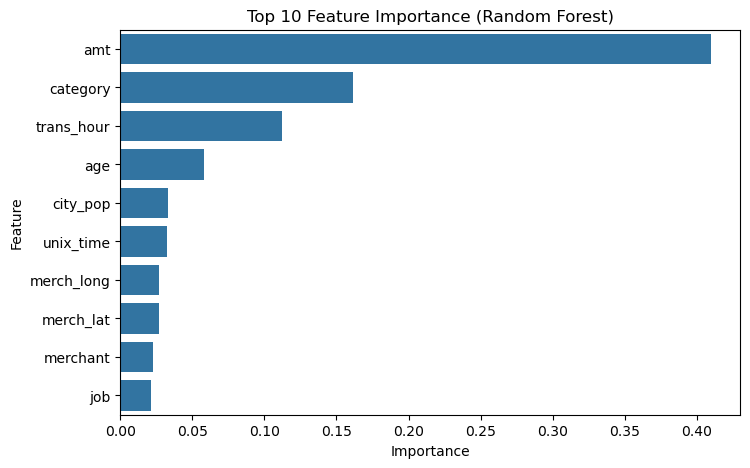

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

top_10 = feature_imp.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_10,
    x='Importance',
    y='Feature'
)
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()


In [ ]:
#CodSoft Internship Report
Task: CREDIT CARD FRAUD DETECTION

Intern Name: Mahendra Hanamant Bidarbhavikar
Internship Domain: Machine Learning
Organization: CodSoft
Task Title: CREDIT CARD FRAUD DETECTION
Programming Language: Python
Duration: 10 January 2026 - 10 February 2026

#1. Introduction
The objective of this internship task was to build a machine learning model capable of detecting fraudulent credit card transactions. 
Fraud detection is a critical real-world problem in the financial sector, where accurate and early detection helps reduce monetary loss and improve customer trust.

#2. Dataset Description
The dataset used consists of two files:
   * fraudTrain.csv
   * fraudTest.csv
The dataset contains 1.29 million transactions with 23 features, including transaction amount, merchant details, customer demographics, geographic information, and transaction timestamps.
The target variable is_fraud indicates whether a transaction is fraudulent (1) or legitimate (0).

#3. Data Preprocessing
The following preprocessing steps were performed:
* Removal of identifier and high-cardinality columns (names, card numbers, transaction IDs)
* Conversion of transaction timestamp into meaningful features (hour, day, month, weekday)
* Conversion of date of birth into customer age
* Encoding of categorical features using ordinal encoding
* Feature scaling using standardization
* Sampling was applied for efficient exploratory data analysis

#4. Exploratory Data Analysis (EDA)
EDA revealed that:
* The dataset is highly imbalanced, with fraudulent transactions being very rare
* Fraudulent transactions often involve higher transaction amounts
* Fraud occurrences vary by transaction category, time of day, and customer behavior
Multiple visualizations such as count plots, histograms, boxplots, and time-based plots were used to understand these patterns.

#5. Model Building
Three machine learning models were trained and evaluated:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
Among these, the Random Forest model performed the best due to its ability to handle complex patterns and imbalanced data.

#6. Model Evaluation
Model performance was evaluated using:
* Accuracy
* Precision
* Recall
* F1-Score
* ROC-AUC Score
* Confusion Matrix
Due to class imbalance, more importance was given to precision, recall, and ROC-AUC rather than accuracy alone.

#7. Conclusion
The project successfully demonstrated how machine learning techniques can be applied to detect fraudulent credit card transactions.
Proper preprocessing and feature engineering significantly improved model performance. 
The Random Forest model proved to be the most effective for this task. 
This project provided valuable hands-on experience with real-world data, data imbalance challenges, and practical machine learning workflows.

#8. Tools & Technologies Used
* Python
* Pandas, NumPy
* Matplotlib, Seaborn
* Scikit-learn
* Jupyter Notebook

# Overall Learning Outcome
This internship enhanced my understanding of data preprocessing, exploratory data analysis, machine learning model development, and evaluation techniques for real-world financial datasets.